<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_17_Matplotlib Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🟩 Data Scientist Hourly Salaries (2.17.1)

**Problem Statement:**

Create a histogram to show the distribution of hourly salaries (use <code>salary_hour_avg</code> column) for Data Scientist job postings:

- Create a new DataFrame called <code>df_DS</code> to filter out 'Data Scientist' jobs.
- Customize the plot by setting the number of bins to 40 and the bar color to blue.
- Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

**Hint:**

Use the DataFrames <code>plot()</code> method and set the <code>bins</code> parameter to 40 and the <code>color</code> parameter to 'blue'.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

---

In [3]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()


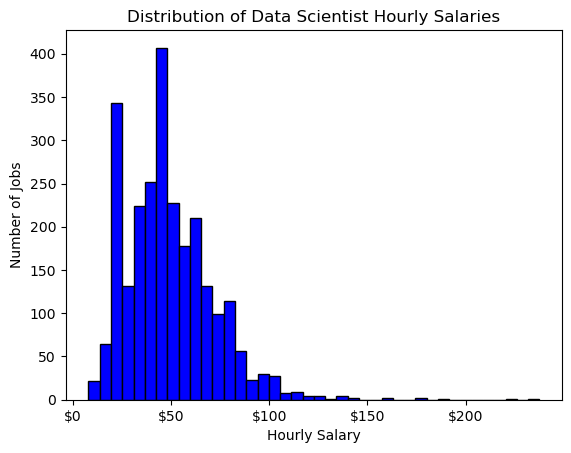

In [7]:
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color = 'blue', edgecolor='black')


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

## 🟨 Job Postings by Number of Skills (2.17.2)

**Problem Statement:**

Create a histogram to show the distribution of job postings by the number of skills listed using the <code>job_skills</code> column:

- Create a new DataFrame called <code>df_skills</code> to filter out job postings with non-null <code>job_skills</code>.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

**Hint:**

Use the DataFrames <code>plot()</code> method and set the <code>bins</code> parameter to 55, the <code>color</code> parameter to 'magenta', and edgecolor to 'black'.

In [11]:
df_skills = df[df['job_skills'].notnull()].copy()
df_skills['skill_count'] = df_skills['job_skills'].apply(len)
#df_skills.head()

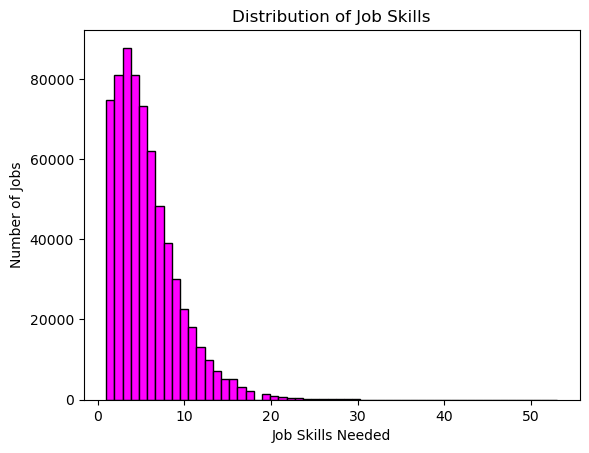

In [13]:
df_skills['skill_count'].plot(kind='hist', bins=55, color = 'magenta', edgecolor='black')

plt.title('Distribution of Job Skills')
plt.xlabel('Job Skills Needed')
plt.ylabel('Number of Jobs')
plt.show()

---

## 🟥 Data Engineer Salaries (2.17.3)

**Problem Statement:**

Create a histogram to show the distribution of average yearly salaries (<code>salary_year_avg</code>) for Data Engineer job postings:

- Create a new DataFrame called <code>df_DE</code> to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using <code>plt.axvline()</code>; for the parameters specify:
    - <code>color</code>: 'blue'/'green'
    - <code>linestyle</code>: 'dashed'
    - <code>label</code>: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

**Hint:**

Use the DataFrames <code>plot()</code> method and set the <code>bins</code> parameter to 50 and the <code>color</code> parameter to 'red'. Use <code>plt.axvline()</code> to add annotations for the mean and median salaries.

In [27]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])


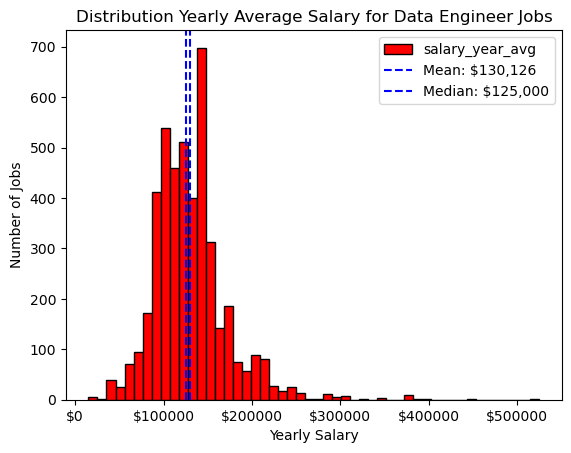

In [31]:
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color = 'red', edgecolor='black')

plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='blue', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

plt.title('Distribution Yearly Average Salary for Data Engineer Jobs')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()

---